In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
from scipy.integrate import cumtrapz

In [4]:
# csvファイルの読み込み
csv_file_path_walk = "data/data_walk.csv"
raw_data_walk = pd.read_csv(csv_file_path_walk)
print(raw_data_walk)

        time         x         y         z
0        486 -0.007561 -0.006854  0.018983
1        549  0.007674 -0.001670  0.000724
2        616  0.006687 -0.007291  0.010674
3        683  0.012188 -0.001626  0.063130
4        749  0.002224 -0.017022 -0.003018
...      ...       ...       ...       ...
1908  126875 -0.034104  0.034198  0.008410
1909  126943 -0.007753  0.027908  0.004918
1910  127005 -0.033514  0.035353  0.007044
1911  127074 -0.010329  0.026625  0.006623
1912  127135 -0.025715  0.028761  0.008528

[1913 rows x 4 columns]


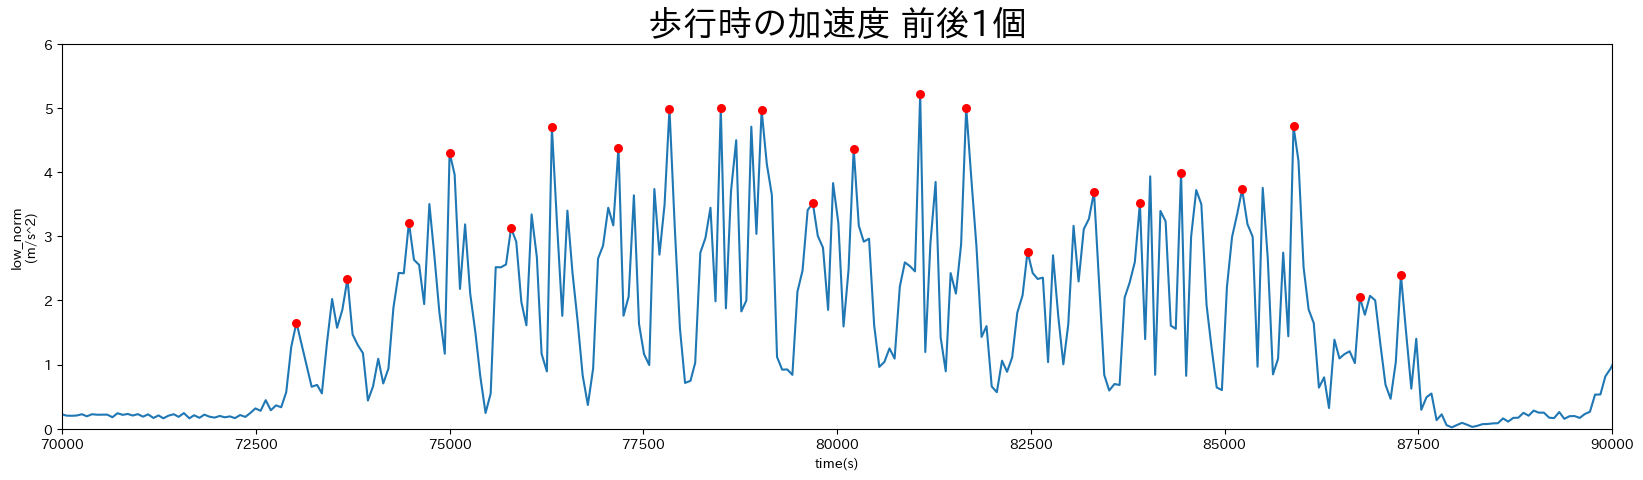

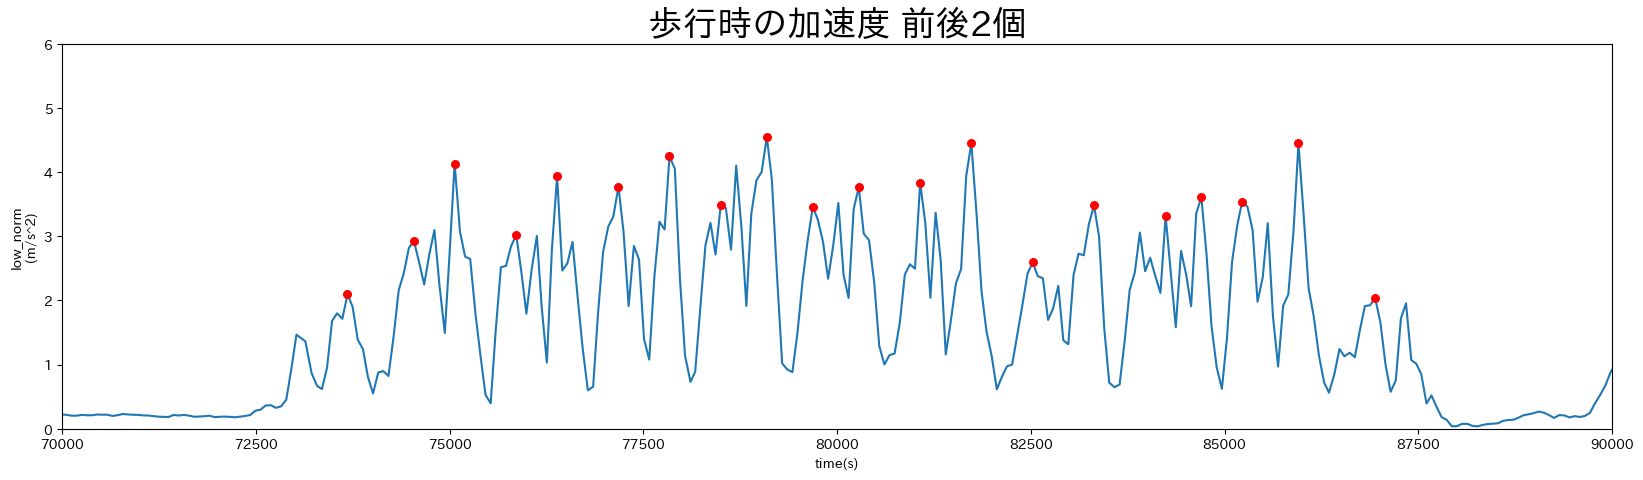

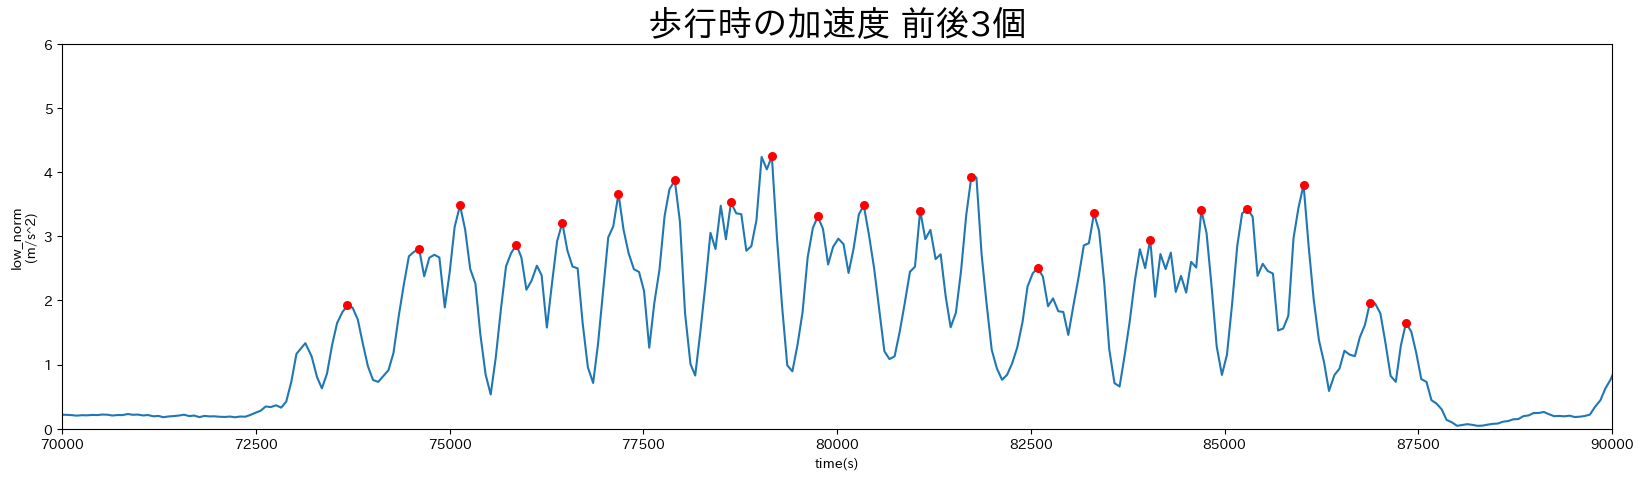

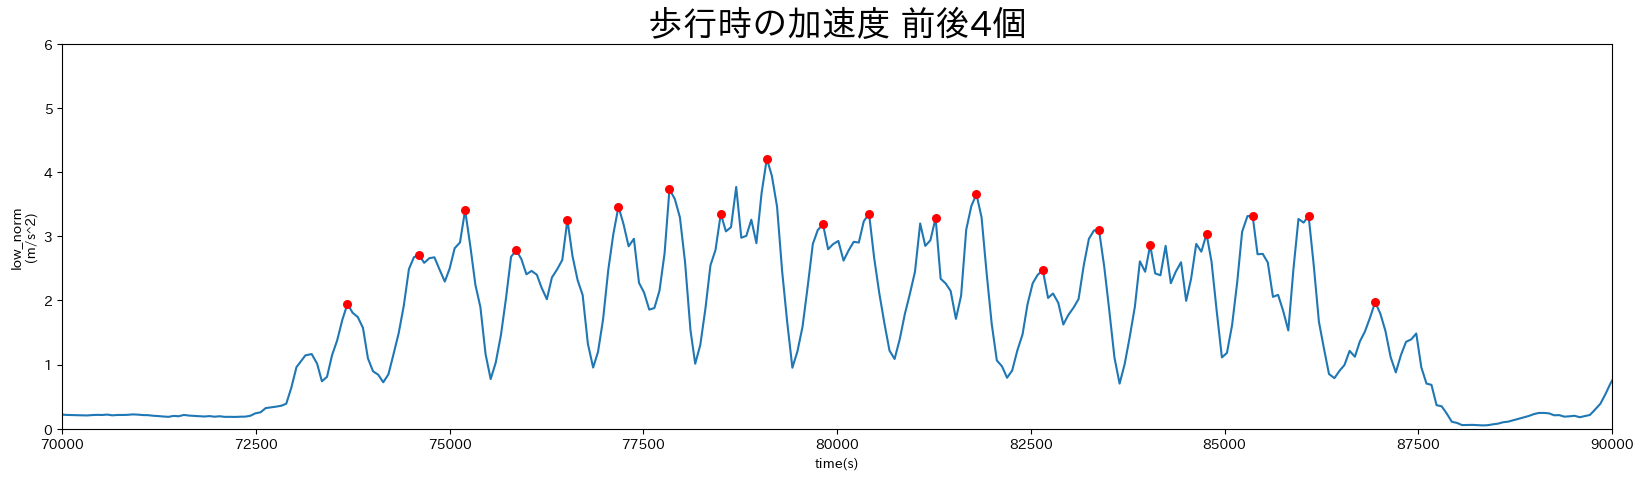

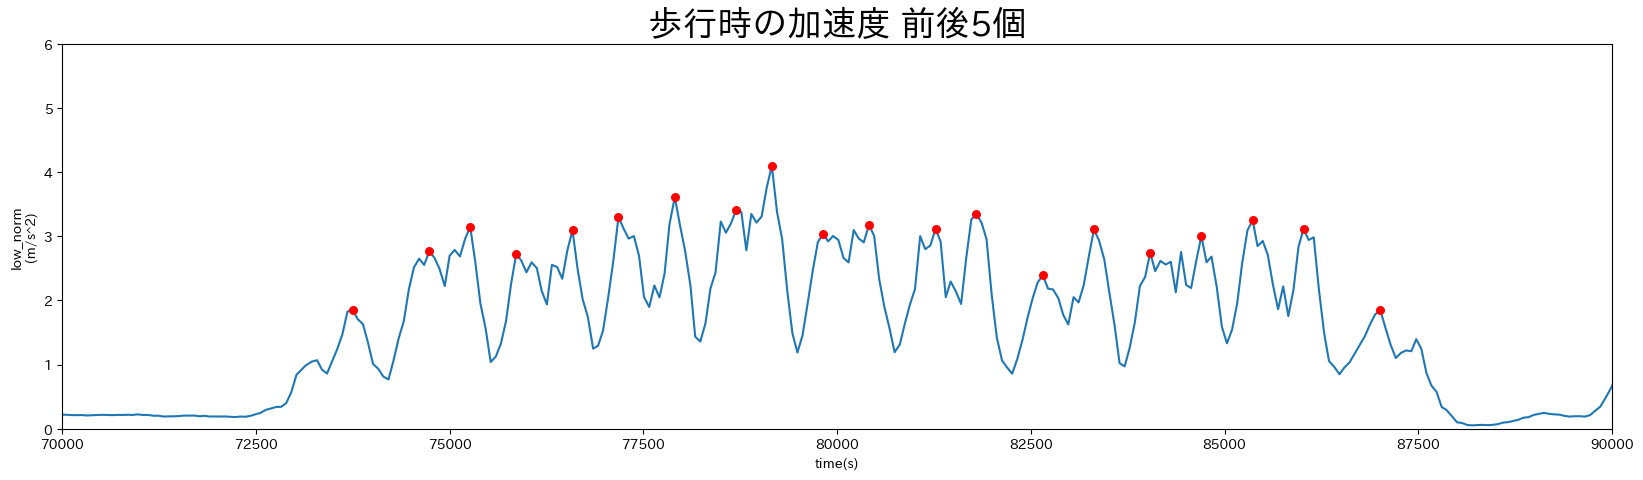

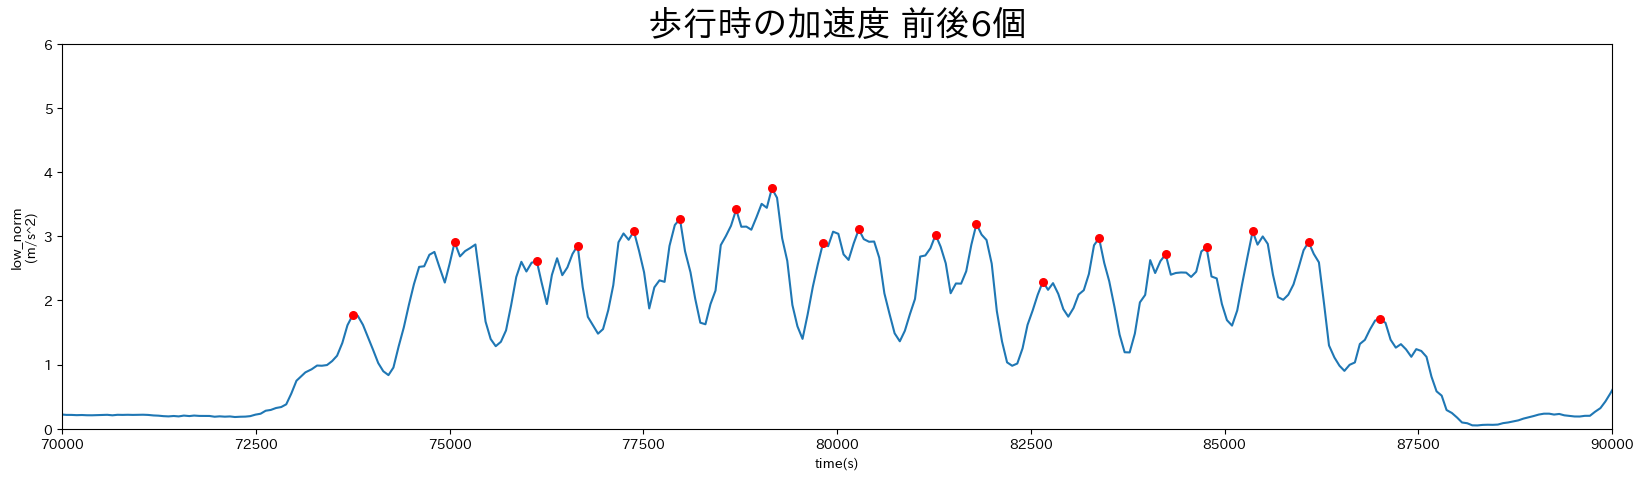

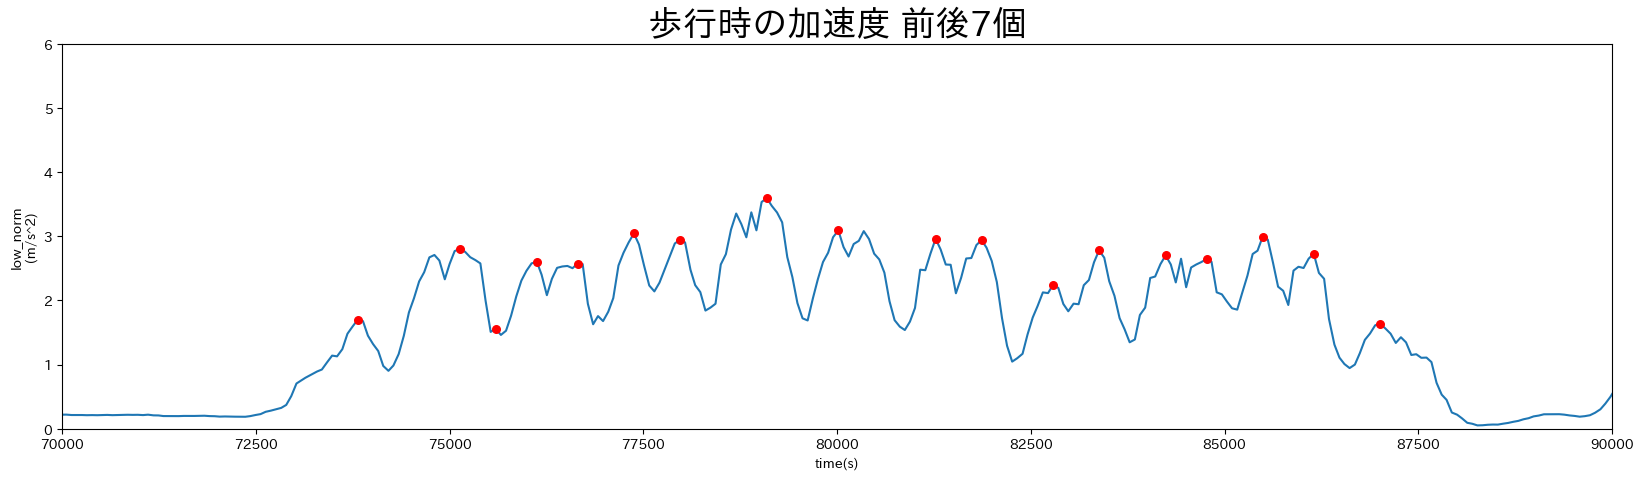

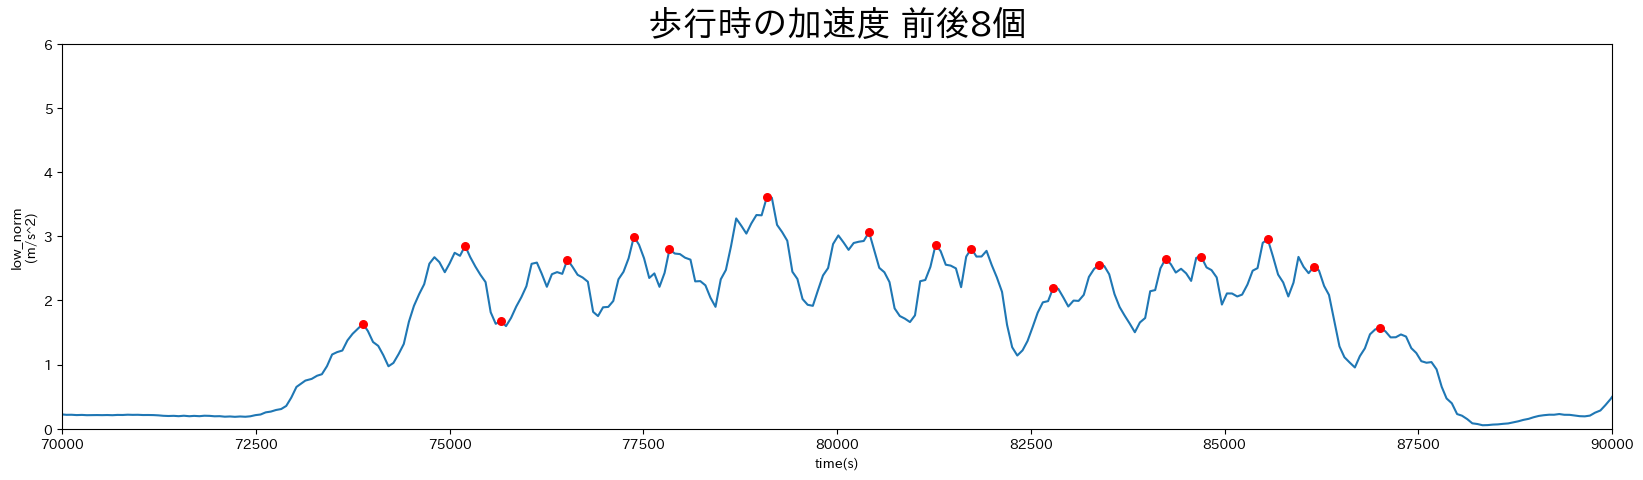

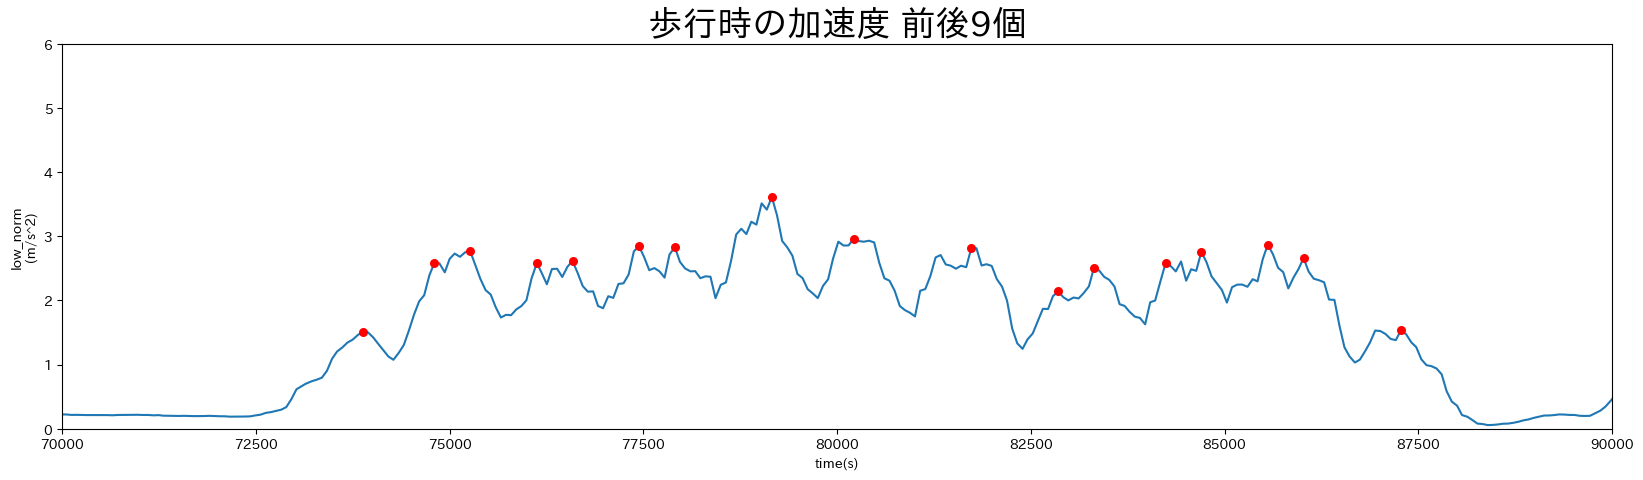

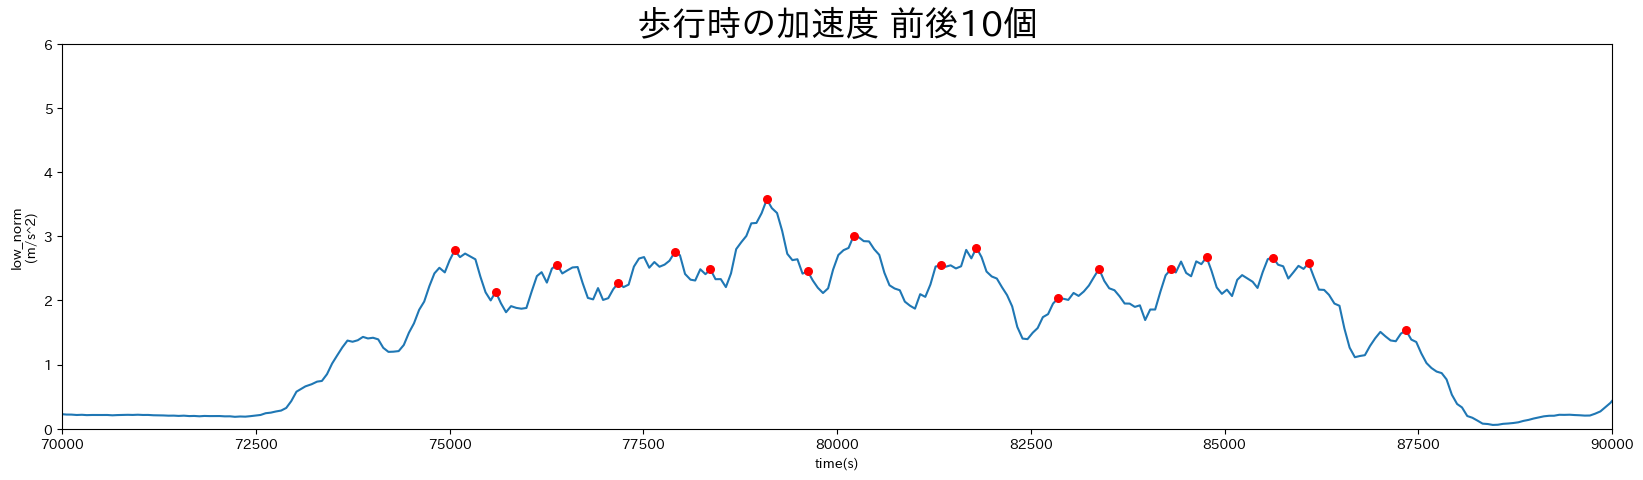

In [5]:
for i in range(10):
    df = pd.read_csv(csv_file_path_walk)
    # normを計算
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    # 移動平均を計算
    df['low_norm'] = df['norm'].rolling(window=i+1).mean()
    # df['low_norm'] = df['low_norm'].rolling(window=10).mean()
    fig = plt.figure(figsize=(20, 5))
    plt.title(f'歩行時の加速度 前後{i+1}個', fontsize=25)
    plt.plot(df['time'], df['low_norm'], zorder=1)
    plt.xlabel('time(s)')
    plt.ylabel('low_norm\n(m/s^2)')
    # 赤点を描画
    peek, _ = signal.find_peaks(df['low_norm'],distance=7, height=1.5)
    plt.scatter(df['time'][peek], df['low_norm']
                [peek], s=30, color='red', zorder=2)
    plt.ylim(0, 6)
    plt.xlim(70000, 90000)
    plt.show()    

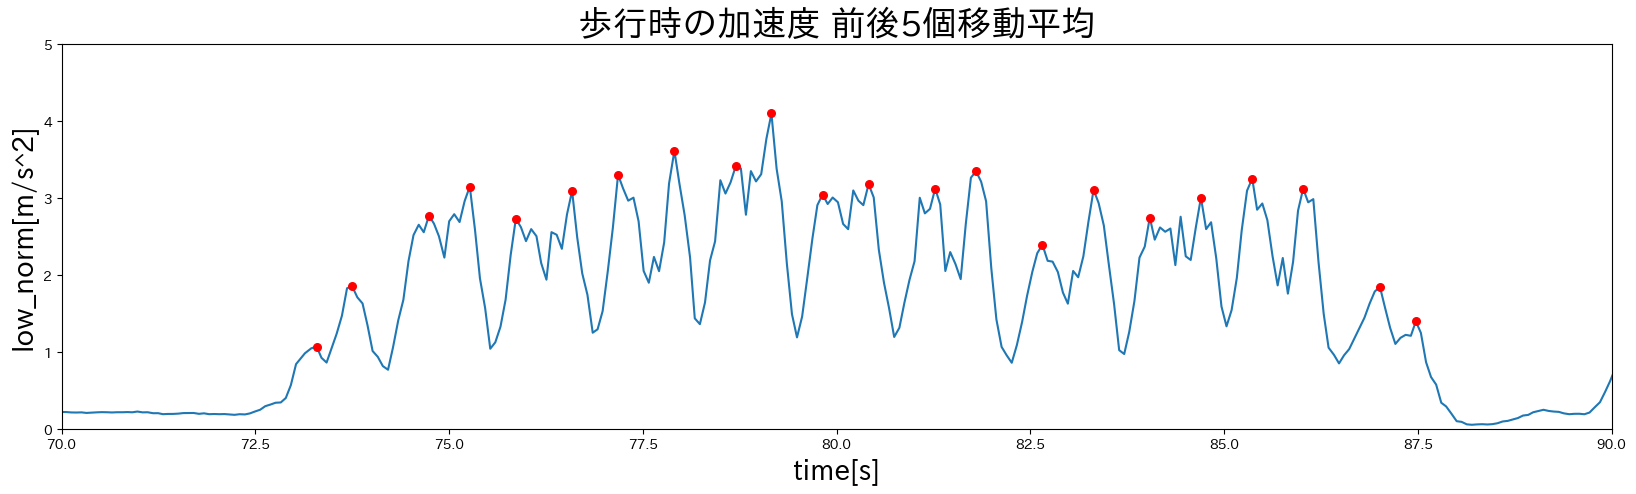

In [6]:
df = pd.read_csv(csv_file_path_walk)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# 移動平均を計算
df['low_norm'] = df['norm'].rolling(window=5).mean()
# df['low_norm'] = df['low_norm'].rolling(window=10).mean()
fig = plt.figure(figsize=(20, 5))
plt.title('歩行時の加速度 前後5個移動平均', fontsize=25)
plt.plot(df['time']/1000, df['low_norm'], zorder=1)
plt.xlabel('time[s]', fontsize=20)
plt.ylabel('low_norm[m/s^2]', fontsize=20)
# 赤点を描画
peek, _ = signal.find_peaks(df['low_norm'],distance=5, height=1)
plt.scatter(df['time'][peek]/1000, df['low_norm']
            [peek], s=30, color='red', zorder=2)
plt.ylim(0, 5)
plt.xlim(70, 90)
plt.show()    

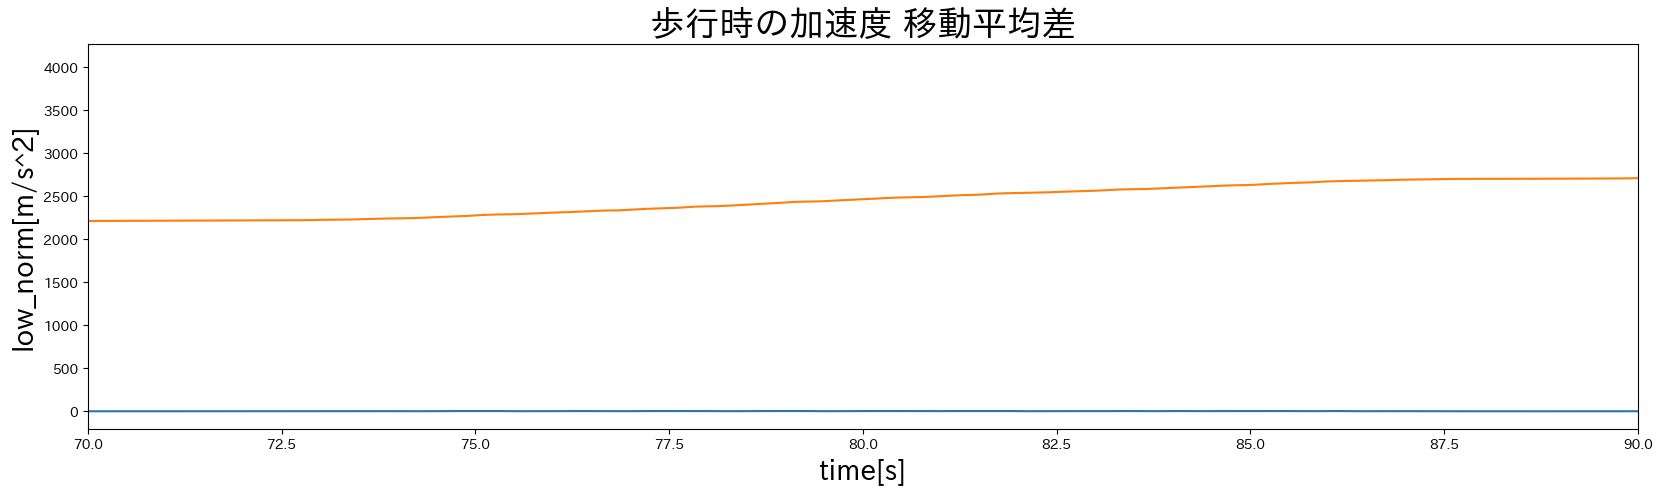

In [29]:
df = pd.read_csv(csv_file_path_walk)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# 移動平均を計算

df['low_norm_1'] = df['norm'].rolling(window=5).mean()
df['low_norm_2'] = df['norm'].rolling(window=20).mean()

# 任意の回数の微分を行う
diff_order = 2  # 微分の回数
diff_norm = df['norm']  # 初期値は元のnorm列とする
for _ in range(diff_order):
    diff_norm = np.diff(diff_norm)

# 任意の回数の積分を行う
int_order = 1  # 積分の回数
integrated_norm = df['norm']  # 初期値は元のnorm列とする
for _ in range(int_order):
    integrated_norm = cumtrapz(integrated_norm, dx=1)
    
fig = plt.figure(figsize=(20, 5))
plt.title('歩行時の加速度 移動平均差', fontsize=25)
plt.xlim(70, 90)
# plt.ylim(-5, 5)
plt.plot(df['time']/1000, df['low_norm_1'], zorder=1)
# plt.plot(df['time']/1000, df['low_norm_2'], zorder=1)
# plt.plot(df['time'][:-diff_order] / 1000, diff_norm, zorder=1)
plt.plot(df['time'][:len(integrated_norm)] / 1000, integrated_norm, zorder=1)
plt.xlabel('time[s]', fontsize=20)
plt.ylabel('low_norm[m/s^2]', fontsize=20)
plt.show()    

腰の位置における加速度を推定できれば、歩行姿勢の推定ができる？